#### Time to Contact Correlation

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Projects/Coding Projects/Biomechanics/data/')

In [42]:
ttc = pd.read_csv('./full/merged_data.csv')
ttc = ttc[ttc['time_to_contact'].notna()]
ttc = ttc[ttc['pitch_count'] > 100]

### TTC Correlations

In [43]:
import statsmodels.api as sm

numeric_ttc = ttc.select_dtypes(include=['number'])
control_vars = ['swing_percent']
cols = [col for col in numeric_ttc.columns if col not in ['time_to_contact'] + control_vars]

partial_corr = {}
# Prepare a design matrix with constant for the control variables.
X_control = sm.add_constant(numeric_ttc[control_vars])

for col in cols:
    # Regress time_to_contact on control variables and get residuals.
    model_y = sm.OLS(numeric_ttc['time_to_contact'], X_control).fit()
    resid_y = model_y.resid
    
    # Regress current variable on control variables and get residuals.
    model_x = sm.OLS(numeric_ttc[col], X_control).fit()
    resid_x = model_x.resid
    
    # Compute correlation between the residuals.
    partial_corr[col] = np.corrcoef(resid_y, resid_x)[0, 1]

# Display the partial correlations sorted from high to low.
print(pd.Series(partial_corr).sort_values(ascending=False))


average_swing_length    0.700586
attack_angle            0.313721
pull_pct                0.227980
ideal_angle             0.216321
age                     0.174191
o_swing_pct             0.086672
csw_pct                 0.053049
whiff_percent           0.027562
def                     0.027189
swstr_pct               0.023549
vertical_swing_path     0.019272
k_pct                   0.010731
fastball_value         -0.002255
squared_up_swing       -0.005653
bb_pct                 -0.006359
squared_up_contact     -0.008568
z_contact_pct          -0.014055
chase_value            -0.015190
contact_pct            -0.028989
season.2               -0.032782
season.3               -0.032782
season                 -0.032782
season.1               -0.032782
sweet_spot_pct         -0.035077
overall_value          -0.042331
offspeed_value         -0.050419
barrel_rate            -0.051210
swords                 -0.056954
pitch_count            -0.075504
pa                     -0.079327
z_swing_pc

### Correlation Between Breaking Ball Value

In [44]:
corrs = numeric_ttc.corr()['breaking_value'].sort_values(ascending=False)
print(corrs)

breaking_value          1.000000
overall_value           0.654263
xwoba                   0.420878
chase_value             0.369394
off                     0.344239
pitch_count             0.330387
war                     0.329812
woba                    0.329646
wrc_plus                0.326441
pa                      0.319596
adj_ev                  0.313733
ev50                    0.313098
bb_pct                  0.296601
hard_hit_pct            0.295225
fastball_value          0.287802
xwobacon                0.287495
barrel_rate             0.285724
z_swing_pct             0.273803
offspeed_value          0.259953
blasts_swing            0.249393
avg_bat_speed           0.241398
blasts_contact          0.237046
fast_swing_rate         0.209645
swords                  0.206409
average_swing_length    0.108888
pull_pct                0.083328
age                     0.073102
sweet_spot_pct          0.057884
attack_angle            0.042925
babip                   0.042733
vertical_s

In [45]:
ttc_diff = ttc.copy()
ttc_diff['o_swing_pct'] = ttc_diff['o_swing_pct'] * 100
ttc_diff = ttc_diff.groupby('name').filter(lambda group: len(group) >= 2)
ttc_diff['time_to_contact_diff'] = ttc_diff.groupby('name')['time_to_contact'].diff()
ttc_diff['o_swing_pct_diff'] = ttc_diff.groupby('name')['o_swing_pct'].diff()
ttc_diff['overall_value_diff'] = ttc_diff.groupby('name')['overall_value'].diff()
ttc_diff['chase_value_diff'] = ttc_diff.groupby('name')['chase_value'].diff()
ttc_diff['swing_percent_diff'] = ttc_diff.groupby('name')['swing_percent'].diff()
ttc_diff['ev50_diff'] = ttc_diff.groupby('name')['ev50'].diff()
ttc_diff['breaking_value_diff'] = ttc_diff.groupby('name')['breaking_value'].diff()
ttc_diff['sweet_spot_pct_diff'] = ttc_diff.groupby('name')['sweet_spot_pct'].diff()
ttc_diff['avg_bat_speed_diff'] = ttc_diff.groupby('name')['avg_bat_speed'].diff()
ttc_diff['average_swing_length_diff'] = ttc_diff.groupby('name')['average_swing_length'].diff()
ttc_diff['xwoba_diff'] = ttc_diff.groupby('name')['xwoba'].diff()
ttc_diff['fastball_value_diff'] = ttc_diff.groupby('name')['fastball_value'].diff()
ttc_diff['offspeed_value_diff'] = ttc_diff.groupby('name')['offspeed_value'].diff()

In [46]:
ttc_changes = ttc_diff[['name', 'season', 'time_to_contact_diff', 'o_swing_pct_diff', 'overall_value_diff', 
                        'chase_value_diff', 'swing_percent_diff', 'ev50_diff', 'breaking_value_diff',
                        'sweet_spot_pct_diff', 'avg_bat_speed_diff', 'xwoba_diff', 'average_swing_length_diff',
                        'fastball_value_diff', 'offspeed_value_diff']]

ttc_changes = ttc_changes.dropna()

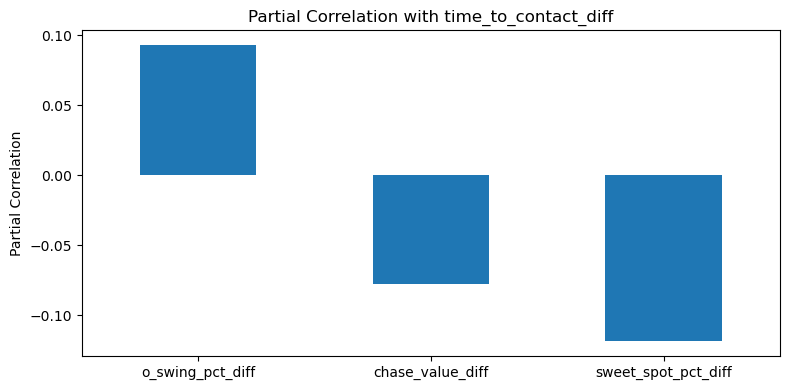

In [54]:
# Select only numeric columns for correlation calculation
numeric_columns = ttc_changes.select_dtypes(include=['number'])
control = ['swing_percent_diff', 'avg_bat_speed_diff']
cols = [col for col in numeric_columns.columns if col not in ['time_to_contact_diff', control]]

# Add a constant to the control variable.
X_control = sm.add_constant(numeric_columns[control])

# Regress the dependent variable on the control for its residuals.
model_y = sm.OLS(numeric_columns['time_to_contact_diff'], X_control).fit()
resid_y = model_y.resid

partial_corr = {}
for col in cols:
    model_x = sm.OLS(numeric_columns[col], X_control).fit()
    resid_x = model_x.resid
    partial_corr[col] = np.corrcoef(resid_y, resid_x)[0, 1]

# Plot the sorted partial correlations as a bar chart
# drop average swing length diff from partial_corr
cols_to_plot = ['o_swing_pct_diff', 'sweet_spot_pct_diff', 'chase_value_diff']
partial_corr_plot = {k: v for k, v in partial_corr.items() if k in cols_to_plot}
ax = pd.Series(partial_corr_plot).sort_values(ascending=False).plot(kind='bar', figsize=(8, 4))
plt.ylabel('Partial Correlation')
plt.title('Partial Correlation with time_to_contact_diff')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [48]:
increase_group = ttc_changes[ttc_changes['time_to_contact_diff'] > 0.005]
decrease_group = ttc_changes[ttc_changes['time_to_contact_diff'] < -0.005]
no_change_group = ttc_changes[(ttc_changes['time_to_contact_diff'] > -0.001) & (ttc_changes['time_to_contact_diff'] < 0.001)]

increase_num = increase_group.select_dtypes('number')
decrease_num = decrease_group.select_dtypes('number')
no_change_num = no_change_group.select_dtypes('number')

# Set the constant values for the control columns to their mean in the whole ttc_changes dataset
const_swing = ttc_changes['swing_percent_diff'].mean()
const_batspeed = ttc_changes['avg_bat_speed_diff'].mean()
const_xwoba = ttc_changes['xwoba_diff'].mean()


def compute_adjusted_df(df, num_df):
    adjusted = num_df.copy()
    for col in num_df.columns:
        if col in ['season', 'time_to_contact_diff']:
            # Don't adjust season or the dependent variable
            continue
        # Build the control matrix for this group
        X = np.column_stack([
            df['swing_percent_diff'],
            df['avg_bat_speed_diff'],
            df['xwoba_diff']
        ])
        # Target values for the controls (means from the whole dataset)
        X_const = np.array([const_swing, const_batspeed, const_xwoba])
        # Fit linear regression: col ~ controls
        X_with_const = np.column_stack([np.ones(len(df)), X])
        beta, *coefs = np.linalg.lstsq(X_with_const, num_df[col], rcond=None)[0]
        # Predicted value at the group controls
        pred_at_group = beta + np.dot(X, coefs)
        # Predicted value at the constants
        pred_at_const = beta + np.dot(X_const, coefs)
        # Adjust each value to what it would be if controls were at the constants
        adjusted[col] = num_df[col] + (pred_at_const - pred_at_group)
    # For the control columns, set to the constant
    adjusted['swing_percent_diff'] = const_swing
    adjusted['avg_bat_speed_diff'] = const_batspeed
    adjusted['xwoba_diff'] = const_xwoba
    return adjusted

increase_group_adjusted = compute_adjusted_df(increase_group, increase_num)
decrease_group_adjusted = compute_adjusted_df(decrease_group, decrease_num)
no_change_group_adjusted = compute_adjusted_df(no_change_group, no_change_num)

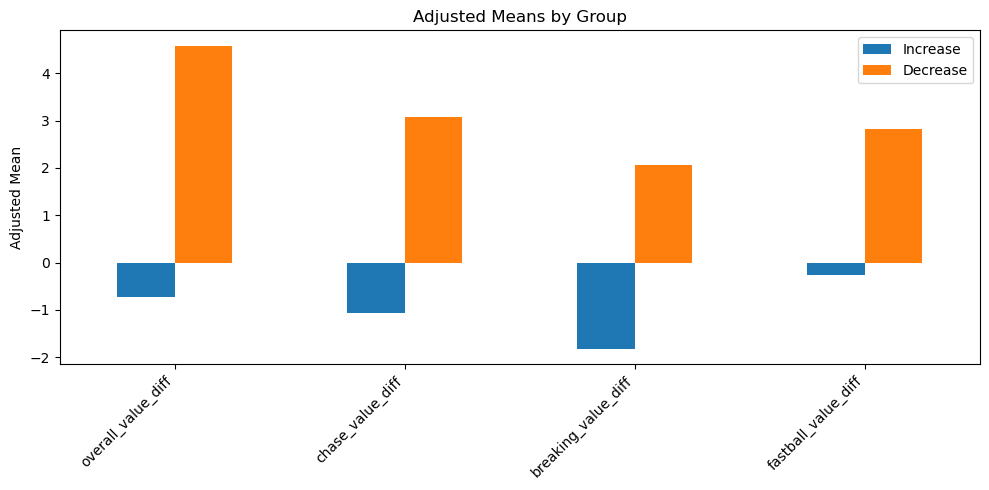

In [ ]:
import matplotlib.pyplot as plt

# Collect means for each group (excluding 'season')
means_df = pd.DataFrame({
    'Increase': increase_group_adjusted.mean(),
    'Decrease': decrease_group_adjusted.mean(),
}).drop('season')

# Select only the specified columns for plotting
cols_to_plot = ['overall_value_diff', 'chase_value_diff', 'breaking_value_diff', 'fastball_value_diff', 'o-swing']
means_df.loc[cols_to_plot].plot(kind='bar', figsize=(10, 5))
plt.ylabel('Adjusted Mean')
plt.title('Adjusted Means by Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### ANOVA Test

In [57]:
from scipy.stats import f_oneway

f_stat_overall, p_val_overall = f_oneway(
    increase_group_adjusted['overall_value_diff'],
    decrease_group_adjusted['overall_value_diff'],
    no_change_group_adjusted['overall_value_diff']
)

f_stat_chase, p_val_chase = f_oneway(
    increase_group_adjusted['chase_value_diff'],
    decrease_group_adjusted['chase_value_diff'],
    no_change_group_adjusted['chase_value_diff']
)

f_stat_break, p_val_break = f_oneway(
    increase_group_adjusted['breaking_value_diff'],
    decrease_group_adjusted['breaking_value_diff'],
    no_change_group_adjusted['breaking_value_diff']
)

f_stat_fastball, p_val_fastball = f_oneway(
    increase_group_adjusted['fastball_value_diff'],
    decrease_group_adjusted['fastball_value_diff'],
    no_change_group_adjusted['fastball_value_diff']
)

print("ANOVA for overall: F = {:.3f}, p = {:.3f}".format(f_stat_o, p_val_o))
print("ANOVA for chase: F = {:.3f}, p = {:.3f}".format(f_stat_chase, p_val_chase))
print("ANOVA for breaking: F = {:.3f}, p = {:.3f}".format(f_stat_break, p_val_break))
print("ANOVA for fastball: F = {:.3f}, p = {:.3f}".format(f_stat_sweet, p_val_sweet))


ANOVA for overall: F = 8.437, p = 0.000
ANOVA for chase: F = 3.222, p = 0.042
ANOVA for breaking: F = 2.459, p = 0.089
ANOVA for fastball: F = 0.613, p = 0.543


### T Test

In [51]:
from scipy.stats import ttest_ind


t_stat, p_val = ttest_ind(
    increase_group_adjusted['breaking_value_diff'],
    decrease_group_adjusted['breaking_value_diff'],
    equal_var=False
)

print("Welch's t-test for breaking_value_diff:")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

Welch's t-test for breaking_value_diff:
t-statistic = -1.719, p-value = 0.093


In [52]:
from scipy.stats import ttest_ind

# Welch's t-test between increase_group_adjusted and no_change_group_adjusted for o_swing_pct_diff
t_stat_oswing, p_val_oswing = ttest_ind(
    increase_group_adjusted['o_swing_pct_diff'],
    no_change_group_adjusted['o_swing_pct_diff'],
    equal_var=False
)

print("Welch's t-test for o_swing_pct_diff (increase vs no change):")
print(f"t-statistic = {t_stat_oswing:.3f}, p-value = {p_val_oswing:.3f}")

Welch's t-test for o_swing_pct_diff (increase vs no change):
t-statistic = 1.304, p-value = 0.206
